In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Define the folder containing the averaged CSV files
folder_path = './avgs'

## Iperf3

    second  transfer  bitrate
0        0      7.69    66.00
1        1      7.63    65.58
2        2      7.60    65.26
3        3      7.69    66.10
4        4      7.77    66.72
..     ...       ...      ...
55      55      7.65    65.74
56      56      7.67    65.86
57      57      7.70    66.12
58      58      7.70    66.18
59      59      7.62    65.48

[240 rows x 3 columns]


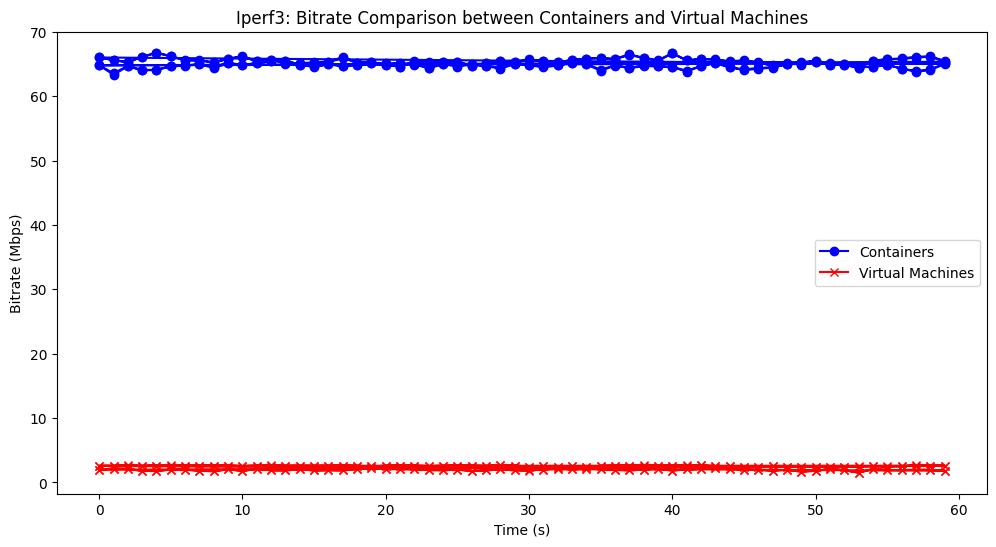

In [6]:
# Initialize lists to store dataframes
containers_data = []
vms_data = []

# Loop through the CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.startswith('iperf'):
        file_path = os.path.join(folder_path, filename)
        # Read the file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Check if the file is for containers or VMs by looking for keywords in the filename
        if 'CT' in filename:
            containers_data.append(df)
        elif 'VM' in filename:
            vms_data.append(df)

# Concatenate the dataframes if data exists
containers_df = pd.concat(containers_data)
print(containers_df)
vms_df = pd.concat(vms_data)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot bitrate for containers using the 'second' column as x-axis
plt.plot(containers_df['second'], containers_df['bitrate'], label='Containers', color='blue', marker='o')

# Plot bitrate for VMs using the 'second' column as x-axis
plt.plot(vms_df['second'], vms_df['bitrate'], label='Virtual Machines', color='red', marker='x')

# Add labels, title, and legend
plt.xlabel('Time (s)')
plt.ylabel('Bitrate (Mbps)')
plt.title('Iperf3: Bitrate Comparison between Containers and Virtual Machines')
plt.legend()

# Display the plot
plt.show()